In [12]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datasets import Dataset, DatasetDict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style and fonts
sns.set_style('whitegrid')
# Increase font sizes for readability
sns.set_context('notebook', font_scale=1.4)
plt.rcParams.update({
    'figure.figsize': (18, 8),
    'font.size': 32,
    'axes.titlesize': 28,
    'axes.labelsize': 25,
    'xtick.labelsize': 23,
    'ytick.labelsize': 23,
    'legend.fontsize': 21
})

In [13]:
base_dir = Path("../data")
datasets = ['ft', 'musiccaps', 'lp-musiccaps', 'zero_shot', 'base']

In [14]:
predictions = {}

for d in datasets:
    print(d)
    model_dir = base_dir / f"{d}_per_sample_scores.csv"
    model_predictions = pd.read_csv(model_dir)
    predictions[d] = pd.DataFrame(model_predictions).head(1000)
display(predictions['ft'].head())

ft
musiccaps
lp-musiccaps
zero_shot
base


,id,aspect_list,prediction,filename,clap_score,fad_score
0,fc382d0ae2b46bd0538115871469af28,"['ambient noises', 'ambient sounds', 'digital ...",This energetic electronic track is marked by i...,fc382d0ae2b46bd0538115871469af28.wav,0.428435,0.856457
1,2bb4b92eba27ea6acac7473a6d6b24d0,"['cheerful', 'country music', 'fast tempo', 'n...",This upbeat country-rock tune kicks off with a...,2bb4b92eba27ea6acac7473a6d6b24d0.wav,0.455299,1.041720
2,0f698b0297962863c59b64ab2382760c,"['acoustic drums', 'acoustic guitar', 'aggress...",This epic heavy metal track begins with an omi...,0f698b0297962863c59b64ab2382760c.wav,0.633122,0.885372
3,5456c0ff1e48d414af58de19a21e2075,"['acoustic drums', 'acoustic guitar', 'bass gu...",This upbeat pop-rock track features a driving ...,5456c0ff1e48d414af58de19a21e2075.wav,0.535959,0.764671
4,bf27536a1f56feefc2b606c4305dbe21,"['male voice', 'movie music', 'passionate']",A sweeping orchestral score unfolds over a bac...,bf27536a1f56feefc2b606c4305dbe21.wav,0.251527,1.097997


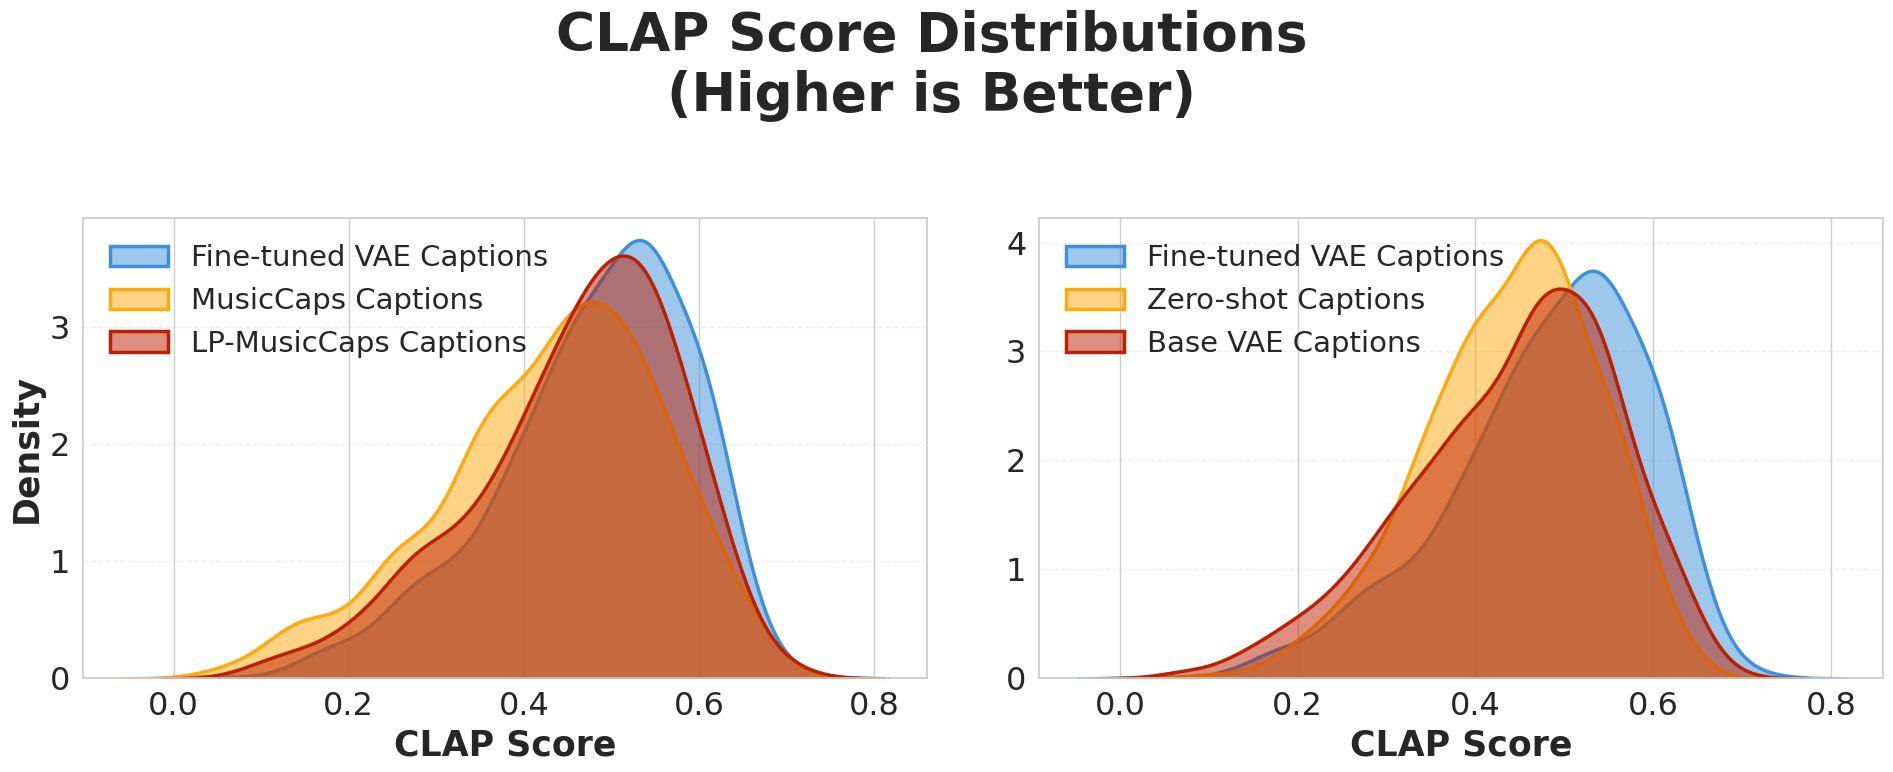

In [28]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plt.style.use('petroff10')

# Left subplot: Dataset comparison
datasets_left = ['ft', 'musiccaps', 'lp-musiccaps']
labels_left = ['Fine-tuned VAE Captions', 'MusicCaps Captions', 'LP-MusicCaps Captions']

for m, label in zip(datasets_left, labels_left):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5, 
                ax=ax1, linewidth=2.5)

ax1.set_xlabel('CLAP Score', fontweight='bold')
ax1.set_ylabel('Density', fontweight='bold')
# ax1.set_ylim(0.0, 4)
ax1.legend(loc='upper left', framealpha=0.0)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right subplot: Model comparison
datasets_right = ['ft', 'zero_shot', 'base']
labels_right = ['Fine-tuned VAE Captions', 'Zero-shot Captions', 'Base VAE Captions']

for m, label in zip(datasets_right, labels_right):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5, 
                ax=ax2, linewidth=2.5)

ax2.set_xlabel('CLAP Score', fontweight='bold')
ax2.set_ylabel('')
ax2.legend(loc='upper left', framealpha=0.0)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Overall title
fig.suptitle('CLAP Score Distributions\n(Higher is Better)', 
             fontweight='bold', y=1.00)

plt.tight_layout()
plt.savefig("../docs/assets/clap_score_distribution_comparison.pdf", bbox_inches='tight')
plt.show()

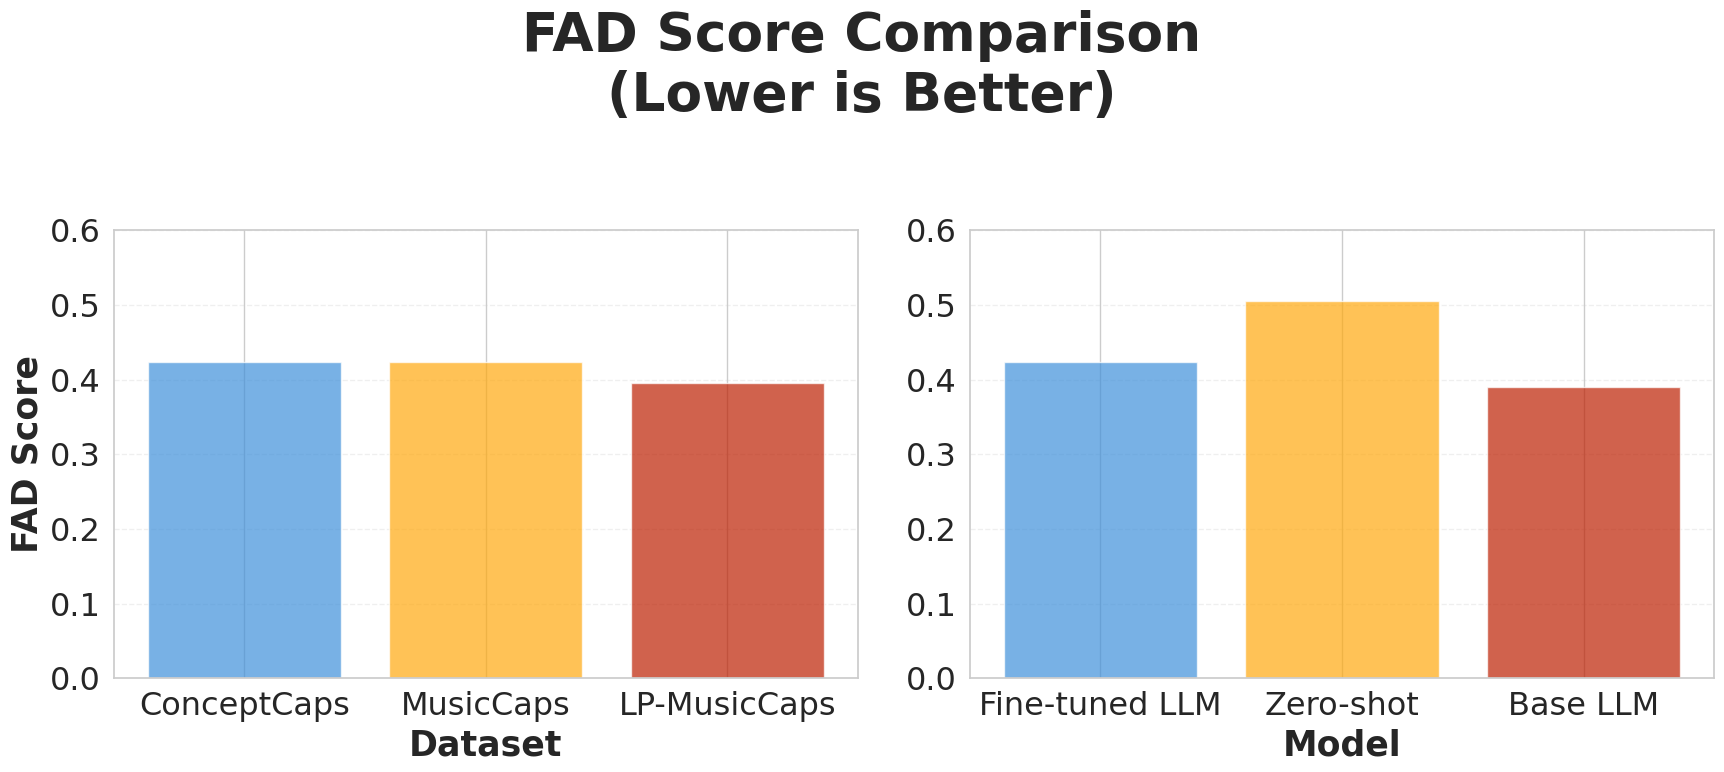

In [31]:
data = {
    'lp-musiccaps': 0.39584,
    'musiccaps': 0.42406,
    'base': 0.3906,
    'zero_shot': 0.5048,
    'ft': 0.4241
}

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.style.use('petroff10')

# Left subplot: Dataset comparison
datasets_left = ['ft', 'musiccaps', 'lp-musiccaps']
labels_left = ['ConceptCaps', 'MusicCaps', 'LP-MusicCaps']

for m, label in zip(datasets_left, labels_left):
    ax1.bar(label, data[m], alpha=0.7)
ax1.set_xlabel('Dataset', fontweight='bold')
ax1.set_ylabel('FAD Score', fontweight='bold')
ax1.set_ylim(0.0, 0.6)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right subplot: Model comparison
datasets_right = ['ft', 'zero_shot', 'base']
labels_right = ['Fine-tuned LLM', 'Zero-shot', 'Base LLM']

for m, label in zip(datasets_right, labels_right):
    ax2.bar(label, data[m], alpha=0.7)
ax2.set_xlabel('Model', fontweight='bold')
ax2.set_ylim(0.0, 0.6)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Overall title
fig.suptitle('FAD Score Comparison\n(Lower is Better)', 
             fontweight='bold', y=1.00)

plt.tight_layout()
plt.savefig("../docs/assets/fad_score_comparison.pdf", bbox_inches='tight')
plt.show()